In [1]:
import pandas as pd
import numpy as np

## 연습용 데이터 3개를 만듦

In [2]:
df1 = pd.DataFrame({'A':['A0', 'A1', 'A2', 'A3'],
                    'B':['B0', 'B1', 'B2', 'B3'],
                    'C':['C0', 'C1', 'C2', 'C3'],
                    'D':['D0', 'D1', 'D2', 'D3']},
                   index=[0,1,2,3])

In [3]:
df2 = pd.DataFrame({'A':['A4', 'A5', 'A6', 'A7'],
                    'B':['B4', 'B5', 'B6', 'B7'],
                    'C':['A4', 'C5', 'C6', 'C7'],
                    'D':['D4', 'D5', 'D6', 'D7']},
                   index=[4,5,6,7])

In [4]:
df3 = pd.DataFrame({'A':['A8', 'A9', 'A10', 'A11'],
                    'B':['B8', 'B9', 'B10', 'B11'],
                    'C':['A8', 'C9', 'C10', 'C11'],
                    'D':['D8', 'D9', 'D10', 'D11']},
                   index=[8,9,10,11])

In [5]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [6]:
df2

,A,B,C,D
4,A4,B4,A4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [7]:
df3

,A,B,C,D
8,A8,B8,A8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


### 데이터를 단순히 합치는 것은 concat 명령임

In [8]:
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,A4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,A8,D8
9,A9,B9,C9,D9


In [9]:
# concat 명령에 keys 옵션으로 구분할 수 있음
# 이렇게 key 지정된 구분은 다중 index가 되어서 level을 형성함

result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   A4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   A8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [11]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                                  'D': ['D2', 'D3', 'D6', 'D7'], 
                                  'F': ['F2', 'F3', 'F6', 'F7']},
                                  index=[2, 3, 6, 7])
result = pd.concat([df1, df4], axis=1)

In [12]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [13]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [14]:
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [15]:
result = pd.concat([df1, df4], axis=1)
result = result.reindex(df1.index)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [16]:
left = pd.DataFrame({'key' : ['K0', 'K4', 'K2', 'K3'],
                     'A' : ['A0', 'A4', 'A2', 'A3'],
                     'B' : ['B0', 'B4', 'B2', 'B3']})

right = pd.DataFrame({'key' : ['K0', 'K1', 'K2', 'K3'],
                     'C' : ['C0', 'C1', 'C2', 'C3'],
                     'D' : ['D0', 'D1', 'D2', 'D3']})

In [17]:
left

,key,A,B
0,K0,A0,B0
1,K4,A4,B4
2,K2,A2,B2
3,K3,A3,B3


In [19]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [20]:
pd.merge(left, right, on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [21]:
pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A4,B4,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [22]:
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [23]:
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A4,B4,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [24]:
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


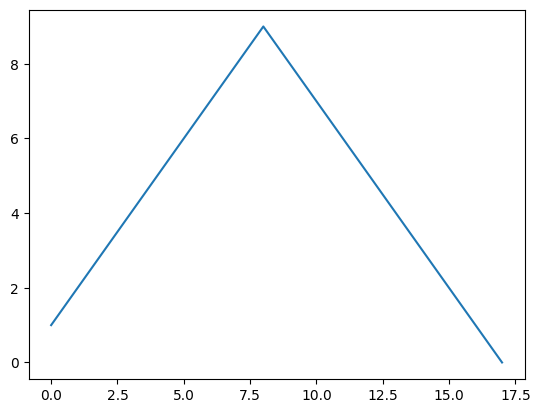

In [25]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

In [26]:
import numpy as np

t = np.arange(0, 12, 0.01)
y = np.sin(t)

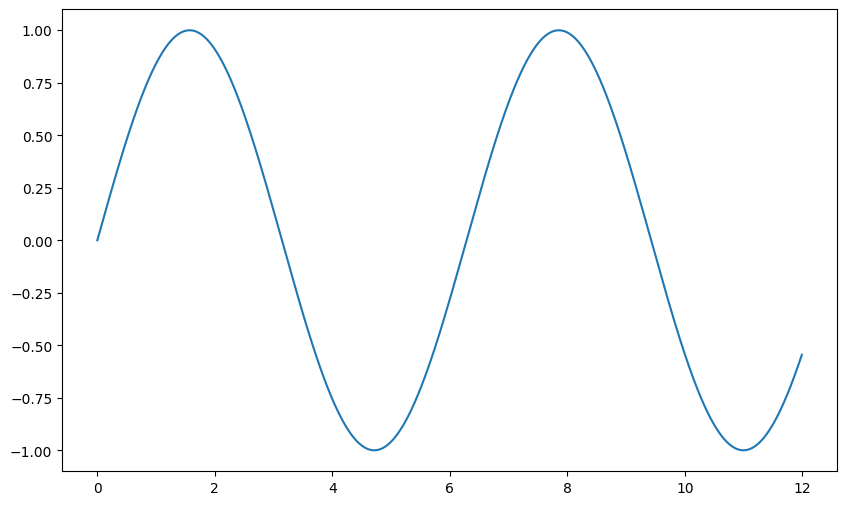

In [27]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.show()

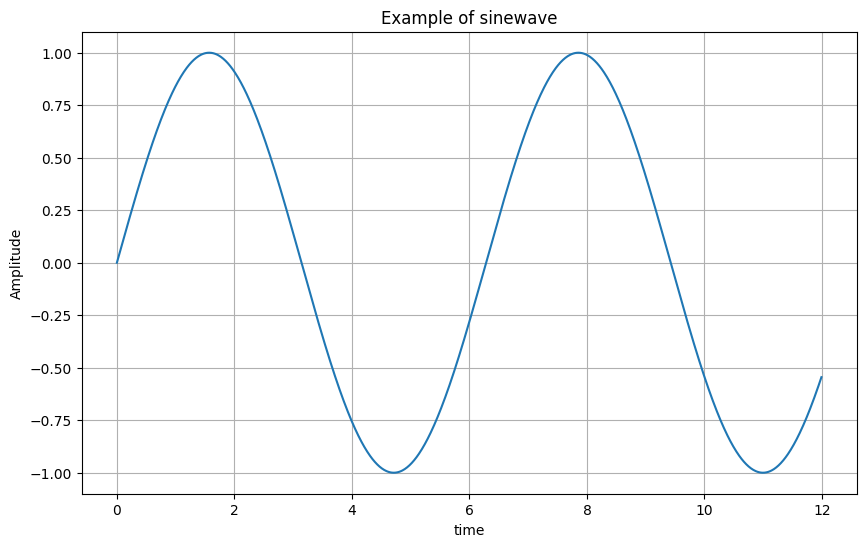

In [28]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

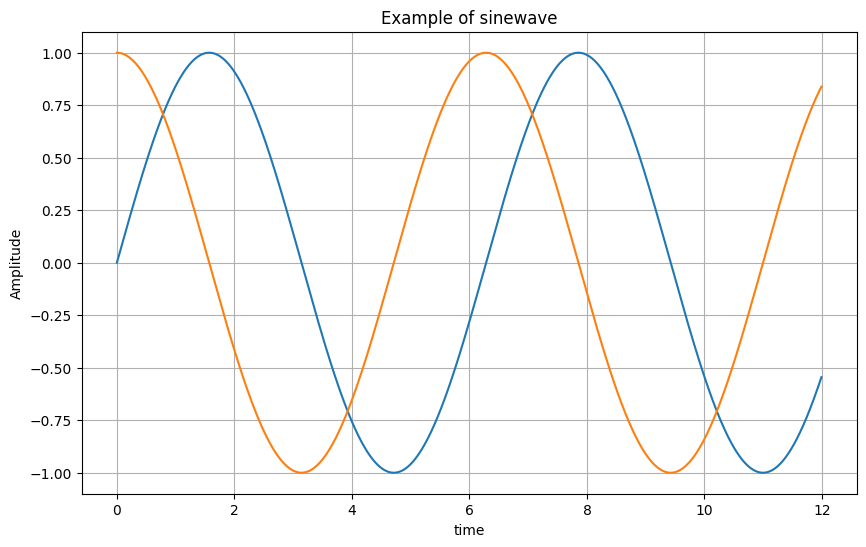

In [29]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

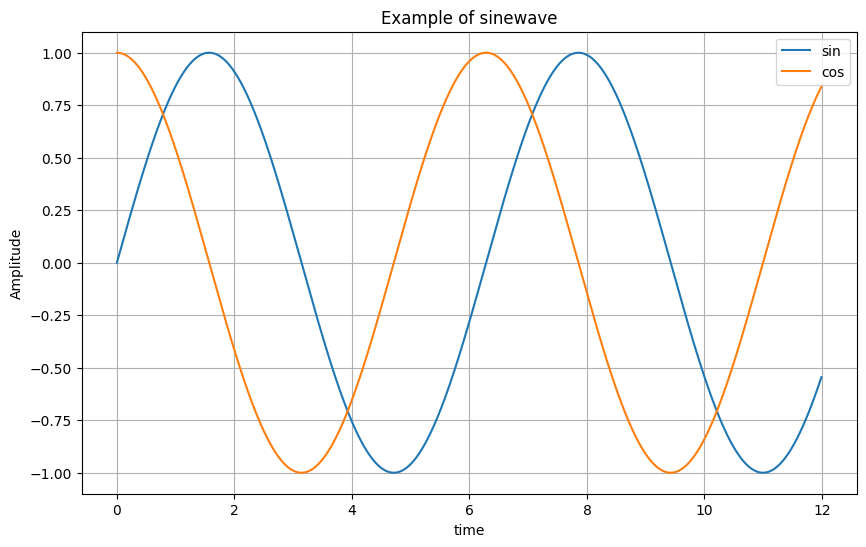

In [31]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

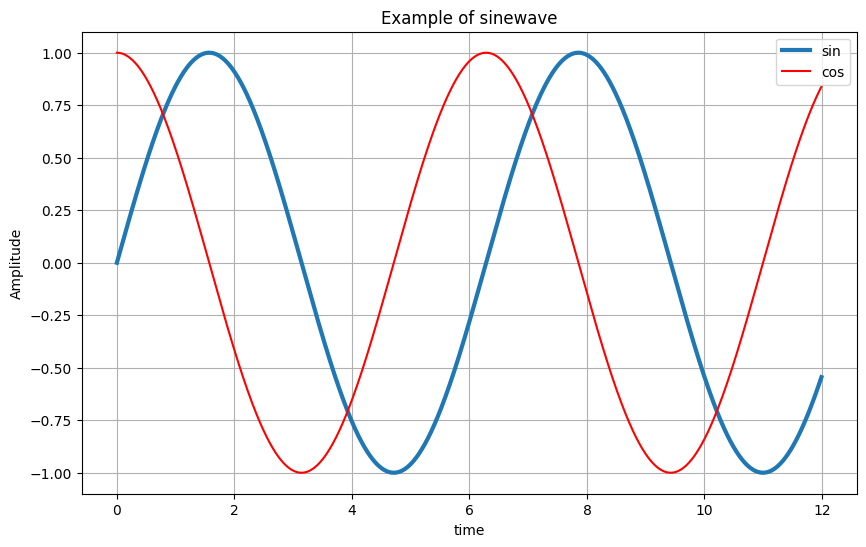

In [32]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

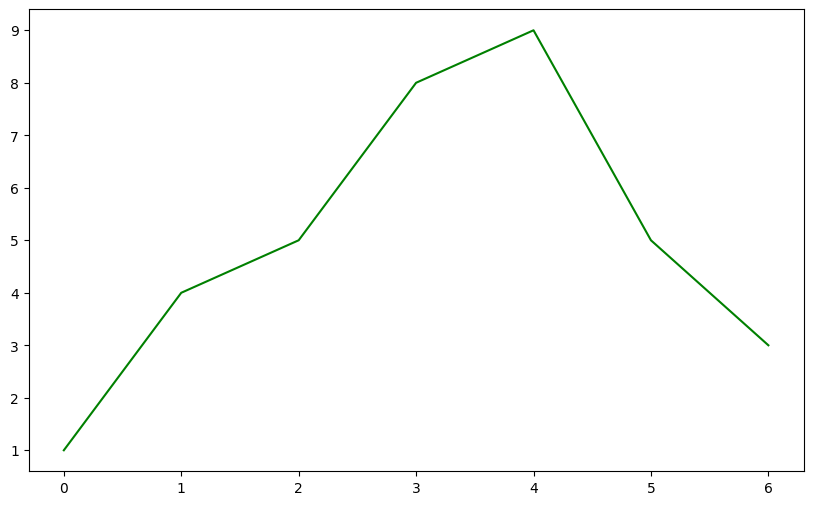

In [33]:
t= [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 5, 8, 9, 5, 3]

plt.figure(figsize=(10, 6))
plt.plot(t, y, color='green')
plt.show()

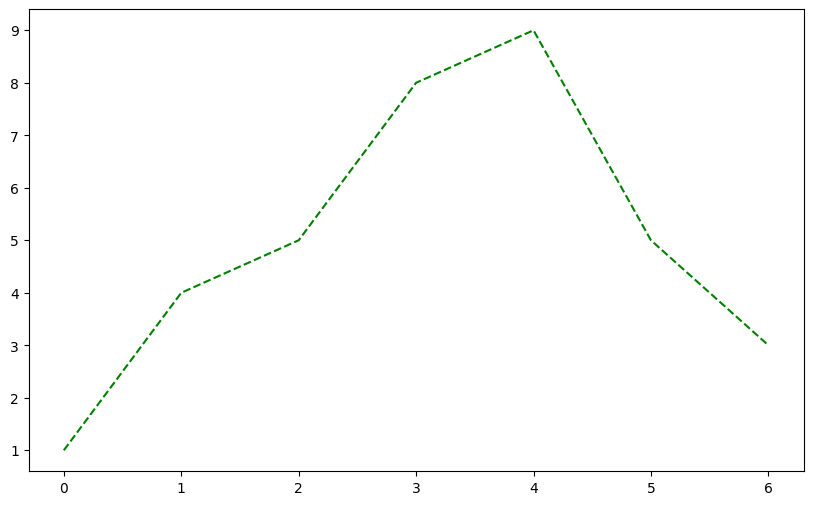

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(t, y, color='green', linestyle='dashed')
plt.show()

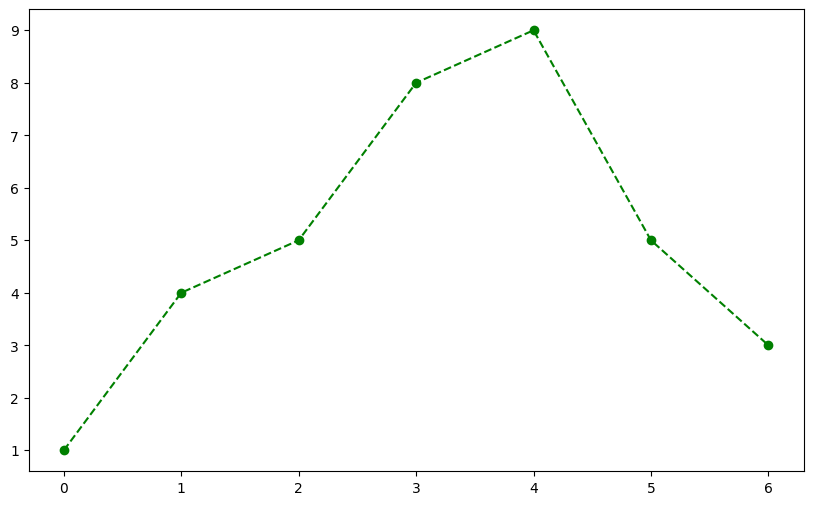

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o')
plt.show()

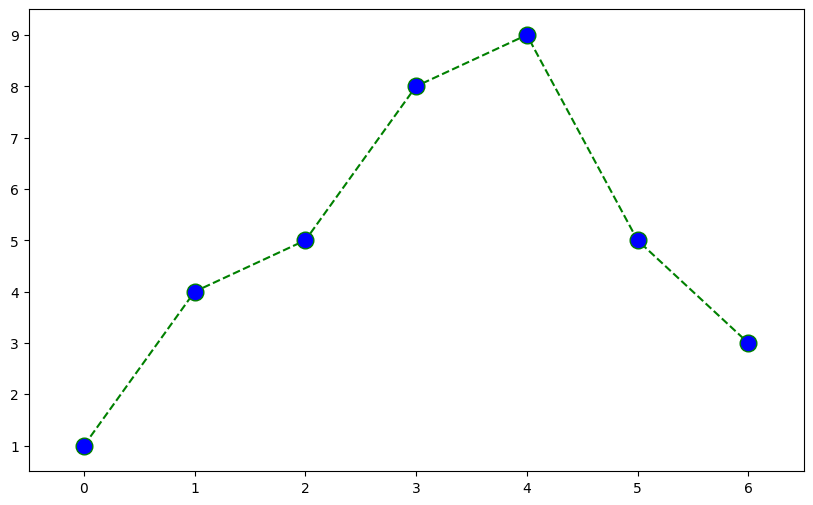

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=12)
plt.xlim([-0.5, 6.5])
plt.ylim([0.5, 9.5])
plt.show()

In [37]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

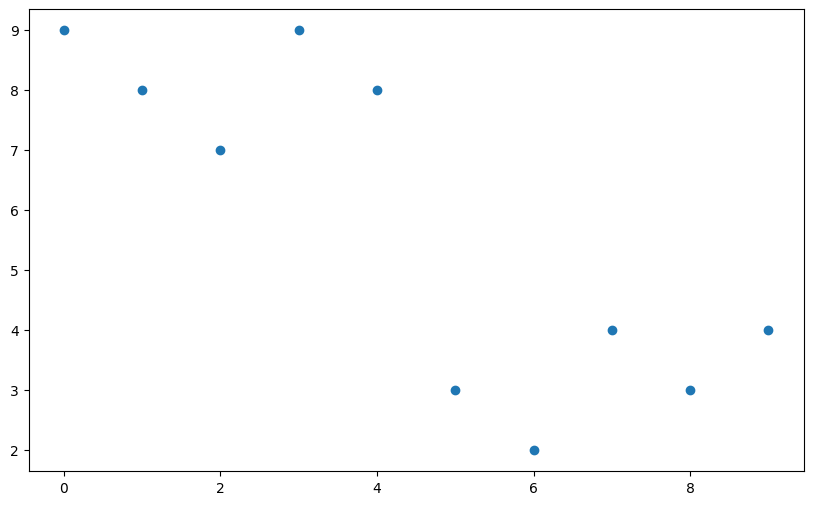

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(t, y)
plt.show()

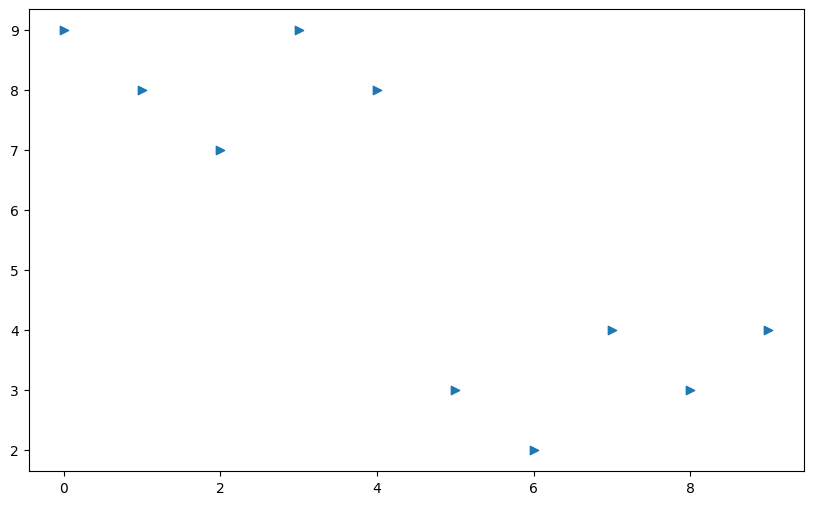

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(t, y, marker='>')
plt.show()

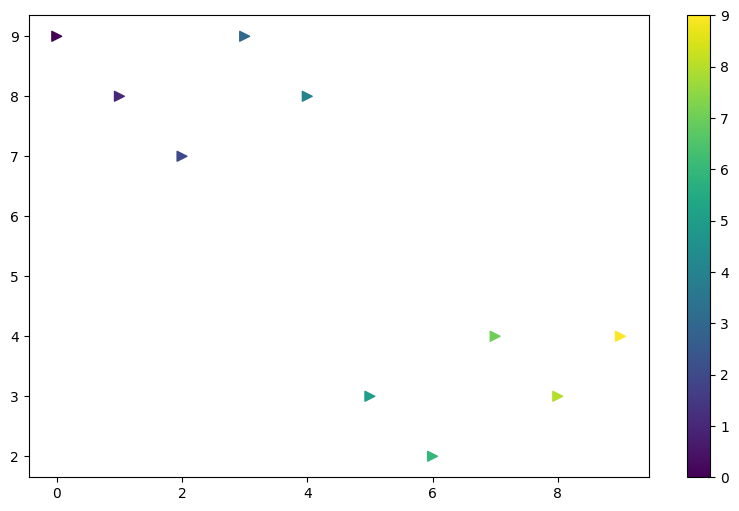

In [41]:
colormap=t
plt.figure(figsize=(10,6))
plt.scatter(t, y, s=50, c=colormap, marker='>')
plt.colorbar()
plt.show()

In [44]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

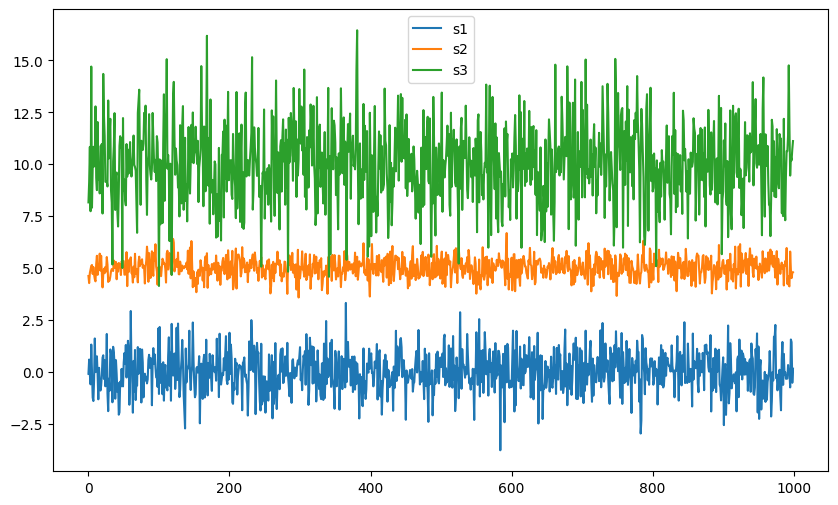

In [45]:
plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

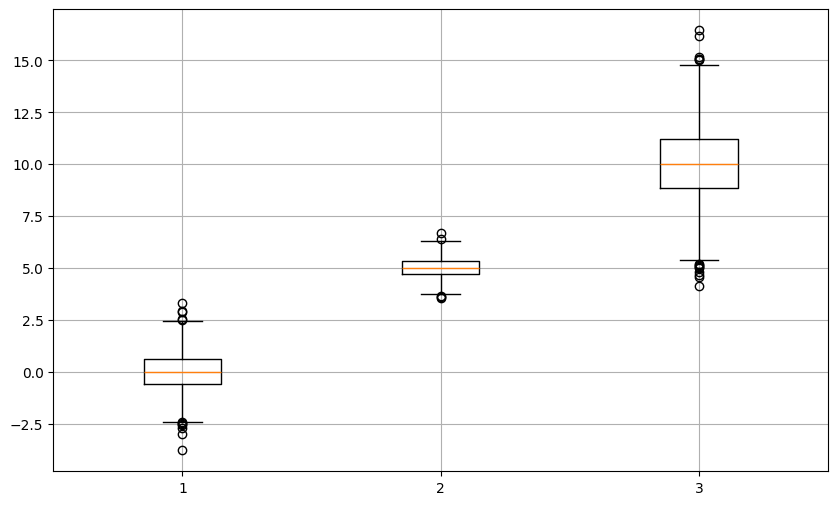

In [46]:
plt.figure(figsize=(10,6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()